In [113]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import collections
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [114]:
strokeData=pd.read_csv("heart.csv")

In [115]:
strokeData

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [116]:
type(strokeData)

pandas.core.frame.DataFrame

In [117]:
Y=strokeData[['output']]

In [118]:
strokeData=strokeData.drop('output',axis=1)

In [119]:
# X=strokeData[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]

In [120]:
strokeData

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [121]:
# Y=strokeData[['output']]

In [122]:
Y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [123]:
type(Y)

pandas.core.frame.DataFrame

In [124]:
strokeData.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
dtype: object

In [125]:
X_train,X_test,Y_train,Y_test=train_test_split(strokeData,Y,test_size=0.2,random_state=4)

In [126]:
Y_train=np.ravel(Y_train)

In [143]:
rf=DecisionTreeClassifier(min_samples_leaf=5,random_state=4)

In [144]:
rf.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=4)

In [152]:
Y_pred_train=rf.predict(X_train)

In [153]:
Y_pred=rf.predict(X_test)

In [159]:
test_accuracy=accuracy_score(Y_test,Y_pred)
train_accuracy=accuracy_score(Y_train,Y_pred_train)

In [160]:
print('test accuracy',test_accuracy)
print('train accuracy',train_accuracy)


test accuracy 0.819672131147541
train accuracy 0.8966942148760331


[0.819672131147541, 0.819672131147541, 0.8032786885245902]
[0.8966942148760331, 0.859504132231405, 0.8347107438016529]


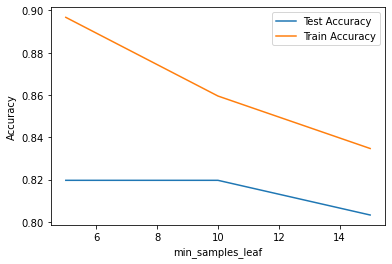

In [196]:
min_samples_leaf=[5,10,15]
models={}
test_accuracy=[]
train_accuracy=[]
pd.DataFrame.to_numpy(X_train)
# pd.DataFrame.to_numpy(Y_train)
Y_train=np.squeeze(Y_train)
for i in min_samples_leaf:
    models[str(i)]=DecisionTreeClassifier(min_samples_leaf=i,random_state=4)
    models[str(i)].fit(X_train,Y_train)
    Y_pred_train=models[str(i)].predict(X_train)
    Y_pred=models[str(i)].predict(X_test)
    train_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred))
    
print(test_accuracy)
print(train_accuracy)
    
# for i in range(len(min_samples_leaf)):
#     plt.plot(min_samples_leaf[i],test_accuracy[i])
#     plt.show()
plt.plot(min_samples_leaf, test_accuracy, label="Test Accuracy")
plt.plot(min_samples_leaf, train_accuracy, label="Train Accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()